In [2]:
import pandas as pd
import numpy as np

# Description of the dataset:

1. userid - a unique identifier for each user
2. movieid - a unique identifier for each movie
3. rating - rating of a movie given by a user
4. timestamp - time at which this rating has been given. we don't concentrate on this feature for this project.


# Collaborative Filtering

Collaborative filtering basically finds the similarity between the items and gives out the most similar items in the dataset for a given input.
Collaborative filtering is of two types as explained below.

**1. User based filtering:**
These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.

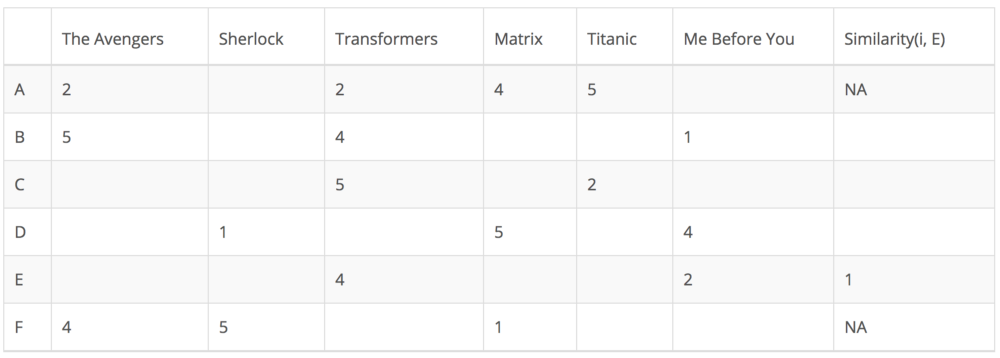

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.

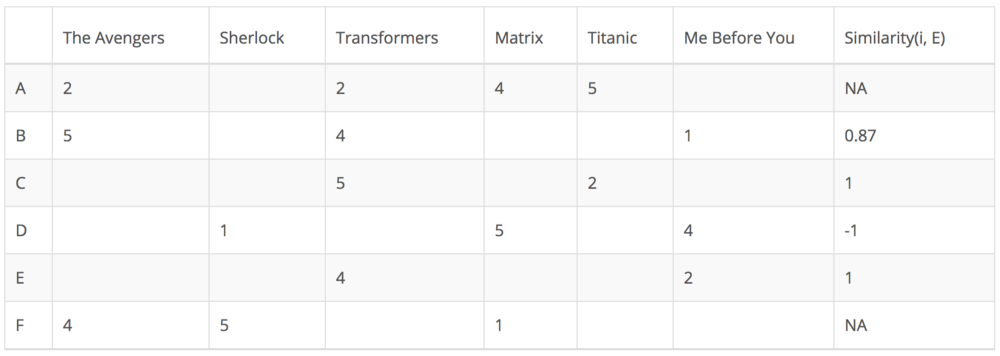

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.

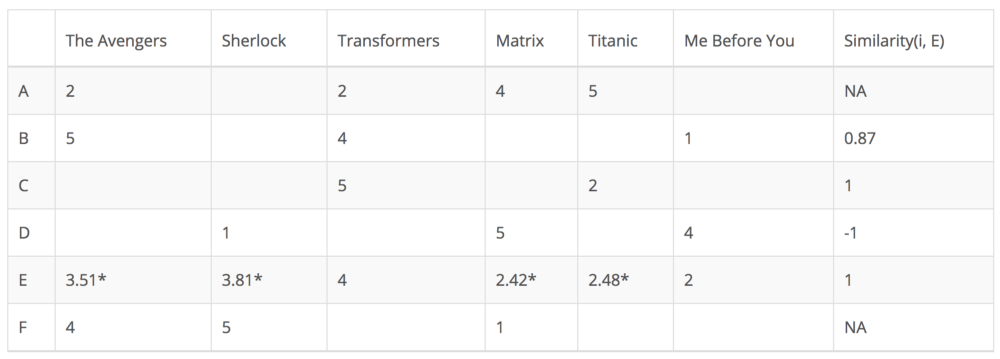

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.


**2. Item based filtering:**
Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.

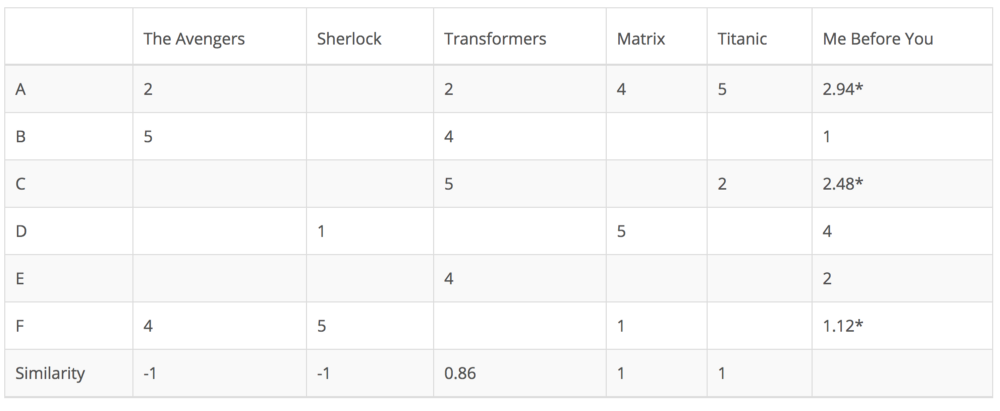

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is **scalability**. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, **sparsity** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.


In [9]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-win_amd64.whl size=1142278 sha256=c7d7d985f2ab030fe8e01c882e43f123f5bf5ac33f2851babf9bf42e57c7741b
  Stored in directory: c:\users\91767\appdata\local\pip\cache\wheels\c6\3a\46\9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [7]:
from surprise import Reader, Dataset, SVD, SVDpp
from surprise.model_selection import cross_validate

In [14]:
reader = Reader()
ratings = pd.read_csv(r'F:\Study\Sem 2\Special Topics\Project\ratings_small.csv\ratings_small.csv')
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [15]:
ratings.userId.value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [16]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


## Applying SVD

In [17]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8951  0.9034  0.8949  0.9067  0.8873  0.8975  0.0069  
MAE (testset)     0.6909  0.6945  0.6880  0.6964  0.6828  0.6905  0.0048  
Fit time          0.80    0.87    0.81    0.93    0.93    0.87    0.06    
Test time         0.11    0.13    0.10    0.12    0.15    0.12    0.02    


{'test_rmse': array([0.89511108, 0.90336712, 0.89491493, 0.90672483, 0.88733283]),
 'test_mae': array([0.69085468, 0.69450035, 0.68801383, 0.69642655, 0.68280802]),
 'fit_time': (0.802415132522583,
  0.8699612617492676,
  0.8081586360931396,
  0.9290897846221924,
  0.9339251518249512),
 'test_time': (0.1112966537475586,
  0.13098573684692383,
  0.09543418884277344,
  0.12024641036987305,
  0.15310311317443848)}

In [18]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [19]:
ratings[ratings['userId'] == 1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [26]:
svd.predict(1, 31, 2.5)

Prediction(uid=1, iid=31, r_ui=2.5, est=2.3445388963642557, details={'was_impossible': False})

## Applying SVD++

In [22]:
svdpp = SVDpp()
cross_validate(svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=1)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8826  0.8866  0.8946  0.8814  0.8864  0.8863  0.0046  
MAE (testset)     0.6736  0.6802  0.6842  0.6764  0.6822  0.6793  0.0038  
Fit time          45.19   46.28   48.22   49.75   49.18   47.73   1.73    
Test time         5.54    10.16   5.81    6.13    6.76    6.88    1.69    


{'test_rmse': array([0.88257825, 0.8866044 , 0.89463443, 0.88139216, 0.88638567]),
 'test_mae': array([0.67361117, 0.68019053, 0.68419778, 0.67644914, 0.68224478]),
 'fit_time': (45.190797567367554,
  46.284831285476685,
  48.2216260433197,
  49.749189138412476,
  49.17919659614563),
 'test_time': (5.541516065597534,
  10.156575441360474,
  5.812297344207764,
  6.1259660720825195,
  6.761963844299316)}

In [24]:
svdpp.fit(trainset)

In [25]:
svdpp.predict(1, 31, 2.5)

Prediction(uid=1, iid=31, r_ui=2.5, est=2.440715643943116, details={'was_impossible': False})

## Using grid search CV to get the best performing model

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [100,150],
              'n_epochs': [5,10],
              'lr_all':[0.005,0.01,0.1],
              'reg_all':[0.02,0.05,0.1]}

### SVD

In [76]:
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data) 

In [81]:
#saving the grid_search as this takes lot of time to re-run
import pickle

file = open(r'F:\Study\Sem 2\Special Topics\Project\grid_search_svd.pkl', 'wb')
pickle.dump(grid_search, file)

In [82]:
#Loading back the grid
grid_search = pickle.load(open(r'F:\Study\Sem 2\Special Topics\Project\grid_search_svd.pkl', 'rb'))

In [83]:
print('Best RMSE value is:', grid_search.best_score['rmse'])
print('Best MAE value is:', grid_search.best_score['mae'])

Best RMSE value is: 0.895929650637767
Best MAE value is: 0.69073957991898


In [84]:
print('Best performing model w.r.t RMSE is:', grid_search.best_params['rmse'])
print('Best performing model w.r.t MAE is:', grid_search.best_params['mae'])

Best performing model w.r.t RMSE is: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}
Best performing model w.r.t MAE is: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}


In [89]:
best_svd = grid_search.best_estimator['rmse']
cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8915  0.8813  0.8885  0.8953  0.8945  0.8902  0.0051  
MAE (testset)     0.6889  0.6793  0.6873  0.6909  0.6874  0.6868  0.0040  
Fit time          0.48    0.45    0.47    0.48    0.47    0.47    0.01    
Test time         0.11    0.11    0.23    0.11    0.22    0.16    0.06    


{'test_rmse': array([0.89145984, 0.88129577, 0.88853588, 0.89530189, 0.8944703 ]),
 'test_mae': array([0.68893275, 0.67926893, 0.68733452, 0.69085627, 0.68739245]),
 'fit_time': (0.4829440116882324,
  0.45215725898742676,
  0.4743349552154541,
  0.47681331634521484,
  0.47387170791625977),
 'test_time': (0.10980606079101562,
  0.1098175048828125,
  0.22971820831298828,
  0.10981154441833496,
  0.22205257415771484)}

In [90]:
#predicting the ratings using the best svd model
trainset = data.build_full_trainset()
best_svd.fit(trainset)

In [91]:
#saving the best SVD model
pickle.dump(best_svd, open(r'F:\Study\Sem 2\Special Topics\Project\best_svd.pkl', 'wb'))

In [92]:
#loading the best svd
best_svd = pickle.load(open(r'F:\Study\Sem 2\Special Topics\Project\best_svd.pkl', 'rb'))

In [93]:
ratings[ratings['userId'] == 1]

userId  movieId  rating
0        1       31     2.5
1        1     1029     3.0
2        1     1061     3.0
3        1     1129     2.0
4        1     1172     4.0
5        1     1263     2.0
6        1     1287     2.0
7        1     1293     2.0
8        1     1339     3.5
9        1     1343     2.0
10       1     1371     2.5
11       1     1405     1.0
12       1     1953     4.0
13       1     2105     4.0
14       1     2150     3.0
15       1     2193     2.0
16       1     2294     2.0
17       1     2455     2.5
18       1     2968     1.0
19       1     3671     3.0

In [94]:
best_svd.predict(1, 31, 2.5)

Prediction(uid=1, iid=31, r_ui=2.5, est=2.4324941345998097, details={'was_impossible': False})

### SVDpp

In [80]:
grid_searchpp = GridSearchCV(SVDpp, param_grid, measures=['rmse','mae'], cv=3)
grid_searchpp.fit(data)

In [85]:
#saving the grid of SVDpp
pickle.dump(grid_searchpp, open(r'F:\Study\Sem 2\Special Topics\Project\grid_search_svdpp.pkl', 'wb'))

In [86]:
#Loading it back
grid_searchpp = pickle.load(open(r'F:\Study\Sem 2\Special Topics\Project\grid_search_svdpp.pkl', 'rb'))

In [87]:
print('Best RMSE value is:', grid_searchpp.best_score['rmse'])
print('Best MAE value is:', grid_searchpp.best_score['mae'])

Best RMSE value is: 0.892892303287096
Best MAE value is: 0.6884480428711433


In [88]:
print('Best performing model w.r.t RMSE is:', grid_searchpp.best_params['rmse'])
print('Best performing model w.r.t MAE is:', grid_searchpp.best_params['mae'])

Best performing model w.r.t RMSE is: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}
Best performing model w.r.t MAE is: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.05}


In [95]:
best_svdpp = grid_searchpp.best_estimator['rmse']
cross_validate(best_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8822  0.8844  0.8873  0.8867  0.8872  0.8856  0.0020  
MAE (testset)     0.6790  0.6829  0.6844  0.6838  0.6803  0.6821  0.0021  
Fit time          88.35   94.99   95.84   100.50  101.25  96.19   4.63    
Test time         5.71    5.79    5.95    6.38    6.25    6.02    0.26    


{'test_rmse': array([0.88215296, 0.88441089, 0.88734009, 0.88669218, 0.88721929]),
 'test_mae': array([0.67903786, 0.68285405, 0.68442837, 0.6837973 , 0.68029242]),
 'fit_time': (88.35215187072754,
  94.98969268798828,
  95.83709287643433,
  100.50456809997559,
  101.25173616409302),
 'test_time': (5.7068376541137695,
  5.791165828704834,
  5.9538350105285645,
  6.384848356246948,
  6.2532265186309814)}

In [96]:
#predicting using the best SVDpp model
trainset = data.build_full_trainset()
best_svdpp.fit(trainset)

In [97]:
#saving the best SVD model
pickle.dump(best_svdpp, open(r'F:\Study\Sem 2\Special Topics\Project\best_svdpp.pkl', 'wb'))

In [98]:
#Loading it back
best_svdpp = pickle.load(open(r'F:\Study\Sem 2\Special Topics\Project\best_svdpp.pkl', 'rb'))

In [99]:
ratings[ratings['userId'] == 1]

userId  movieId  rating
0        1       31     2.5
1        1     1029     3.0
2        1     1061     3.0
3        1     1129     2.0
4        1     1172     4.0
5        1     1263     2.0
6        1     1287     2.0
7        1     1293     2.0
8        1     1339     3.5
9        1     1343     2.0
10       1     1371     2.5
11       1     1405     1.0
12       1     1953     4.0
13       1     2105     4.0
14       1     2150     3.0
15       1     2193     2.0
16       1     2294     2.0
17       1     2455     2.5
18       1     2968     1.0
19       1     3671     3.0

In [101]:
best_svdpp.predict(1, 31, 2.5)

Prediction(uid=1, iid=31, r_ui=2.5, est=2.507616044061412, details={'was_impossible': False})

# Experimenting with other algorithms present in surprise package

In [67]:
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [69]:
reader2 = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader2)

In [70]:
results_benchmarking = []
algorithms = [SVD(),NMF(),KNNWithMeans(),SVDpp(),BaselineOnly(),KNNBasic()]
for test_algo in algorithms:
    results = cross_validate(test_algo,data,measures=['RMSE','MAE'],cv=3,verbose=True)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    split_data = [str(test_algo).split(' ')[0].split('.')[-1]]
    tmp = tmp.append(pd.Series(split_data, index=['Algorithm']))
    results_benchmarking.append(tmp)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9012  0.9007  0.9037  0.9019  0.0013  
MAE (testset)     0.6935  0.6929  0.6991  0.6952  0.0028  
Fit time          0.78    0.84    0.78    0.80    0.03    
Test time         0.30    0.31    0.24    0.28    0.03    
Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9546  0.9652  0.9620  0.9606  0.0044  
MAE (testset)     0.7338  0.7415  0.7383  0.7379  0.0032  
Fit time          1.37    1.53    1.45    1.45    0.07    
Test time         0.24    0.30    0.24    0.26    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fo

In [71]:
results_benchmarking

[test_rmse    0.901852
 test_mae     0.695188
 fit_time     0.798818
 test_time    0.283347
 Algorithm         SVD
 dtype: object,
 test_rmse    0.960601
 test_mae     0.737868
 fit_time     1.451012
 test_time    0.255987
 Algorithm         NMF
 dtype: object,
 test_rmse        0.929137
 test_mae         0.710377
 fit_time         0.166679
 test_time        2.058339
 Algorithm    KNNWithMeans
 dtype: object,
 test_rmse     0.895427
 test_mae       0.68733
 fit_time     34.768134
 test_time     9.643908
 Algorithm        SVDpp
 dtype: object,
 test_rmse        0.896212
 test_mae          0.69324
 fit_time         0.203009
 test_time        0.165006
 Algorithm    BaselineOnly
 dtype: object,
 test_rmse    0.979513
 test_mae     0.753326
 fit_time     0.140309
 test_time    2.018047
 Algorithm    KNNBasic
 dtype: object]

In [72]:
results = pd.DataFrame(results_benchmarking).set_index('Algorithm').sort_values('test_rmse')
results

test_rmse  test_mae   fit_time  test_time
Algorithm                                              
SVDpp          0.895427  0.687330  34.768134   9.643908
BaselineOnly   0.896212  0.693240   0.203009   0.165006
SVD            0.901852  0.695188   0.798818   0.283347
KNNWithMeans   0.929137  0.710377   0.166679   2.058339
NMF            0.960601  0.737868   1.451012   0.255987
KNNBasic       0.979513  0.753326   0.140309   2.018047

In [74]:
trainset, testset = train_test_split(data, test_size=0.2)
algo = SVDpp(n_factors=20,n_epochs=20,lr_all=0.007,reg_all=0.02)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8813


0.8813401198896053